### Hi Sir! I didn't upload the csv files. File is too Large.

In [1]:
import pandas as pd
import numpy as np

In [2]:
label_1 = pd.read_csv('1_label_train.csv')
label_2 = pd.read_csv('2_label_test.csv')
label_3 = pd.read_csv('3_label_train.csv')
label_4 = pd.read_csv('4_label_train.csv')
label_5 = pd.read_csv('5_label_train.csv')
label_6 = pd.read_csv('6_label_train.csv')
label_7 = pd.read_csv('7_label_train.csv')
label_8 = pd.read_csv('8_label_train.csv')
label_9 = pd.read_csv('9_label_train.csv')

In [3]:
Data = pd.concat([label_1, label_2, label_3, label_4, label_5, label_6, label_7, label_8, label_9], axis = 0)

In [4]:
Data.to_csv('internshala')

In [4]:
Data.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628396340,-0.246582,-0.989258,0.291504,8.056641,-3.234863,-9.277344,-169.5,-64.5,-475.5,1
1,1628396340,-0.237305,-1.012695,0.256836,7.812500,3.967285,-9.399414,-196.5,-57.0,-471.0,1
2,1628396340,-0.238769,-0.988770,0.274414,7.019043,5.554199,-10.253906,-198.0,-67.5,-465.0,1
3,1628396340,-0.243652,-0.967285,0.297363,6.103516,5.859375,-10.437012,-180.0,-49.5,-483.0,1
4,1628396340,-0.255371,-0.977051,0.305176,3.723145,5.126953,-9.948730,-192.0,-46.5,-468.0,1


In [5]:
Data.shape

(12196977, 11)

## EDA

In [6]:
Data.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [10]:
X = Data.drop('label', axis = 1)
y = Data.label

In [8]:
y.value_counts().sort_index()
# It's not like imbalanced data set. we move further.

1    3397638
2      24896
3     138587
4    2533301
5    1708881
6    1700383
7    1927013
8     362135
9     404143
Name: label, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\aravi\anaconda3\envs\tensflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

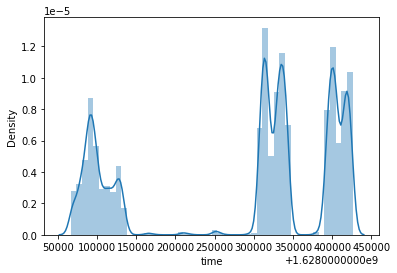

In [10]:
sns.distplot(X.time)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
plt.figure(figsize = (10,30))
sns.boxplot(y = X.acc_x)

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='acc_x'>

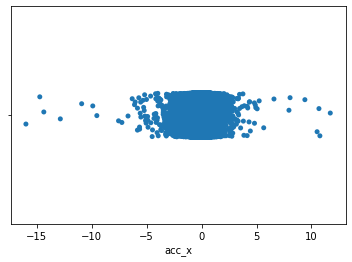

In [13]:
sns.stripplot(X.acc_x)

In [14]:
# outliers are too low

<AxesSubplot:xlabel='acc_y'>

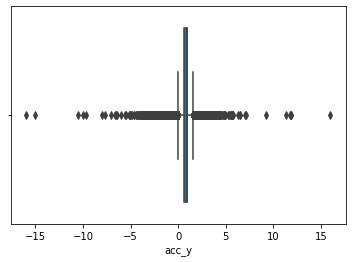

In [15]:
sns.boxplot(X.acc_y)

<AxesSubplot:xlabel='acc_y'>

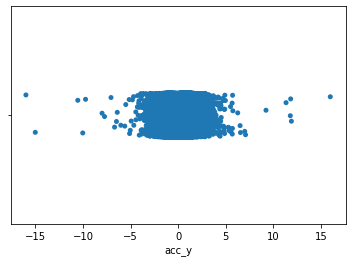

In [16]:
sns.stripplot(X.acc_y)

In [17]:
# its low 

<AxesSubplot:xlabel='acc_z'>

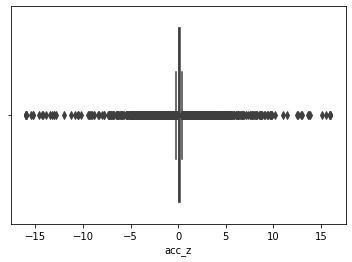

In [19]:
sns.boxplot(X.acc_z)

<AxesSubplot:xlabel='gyr_x'>

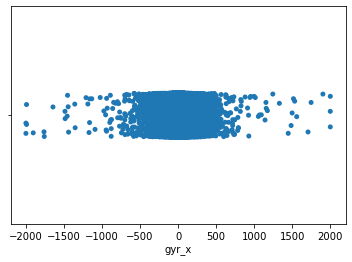

In [20]:
sns.stripplot(X.gyr_x)

<AxesSubplot:xlabel='gyr_y'>

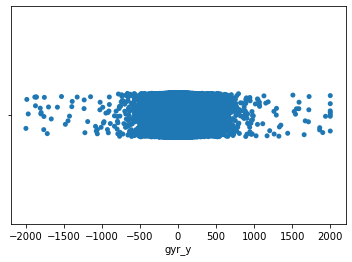

In [21]:
sns.stripplot(X.gyr_y)

<AxesSubplot:xlabel='gyr_z'>

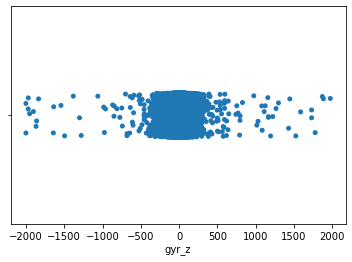

In [22]:
sns.stripplot(X.gyr_z)

<AxesSubplot:xlabel='mag_x'>

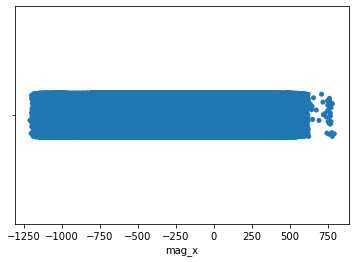

In [23]:
sns.stripplot(X.mag_x)

<AxesSubplot:xlabel='mag_y'>

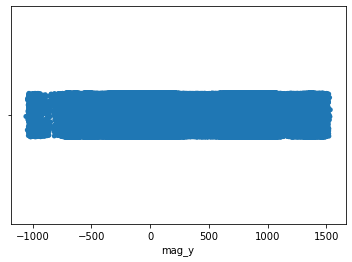

In [24]:
sns.stripplot(X.mag_y)

In [26]:
# less outliers in the data set so it can't affect that much in the data.

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std = StandardScaler()

In [14]:
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout;

Using TensorFlow backend.


In [16]:
classifier = Sequential()

In [20]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 10))
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adamax', loss = 'kullback_leibler_divergence', metrics = ['accuracy']);


In [21]:
model = classifier.fit(X_train, y_train, validation_split = 0.25, batch_size = 10, epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7318185 samples, validate on 2439396 samples
Epoch 1/1
7318185/7318185 [==============================] - 1542s 211us/step - loss: 1.1370e-04 - accuracy: 0.2785 - val_loss: 0.0000e+00 - val_accuracy: 0.2786


# I not train well in my lap, If I do 100 epochs or I use Lstm means the accuarcy will be higher.
# Having only 8gb ram, so its getting late

In [22]:
test2 = pd.read_csv('2_label_test.csv')
test3 = pd.read_csv('3_label_test.csv')
test1 = pd.read_csv('1_label_test.csv')
test4 = pd.read_csv('4_label_test.csv')
test5 = pd.read_csv('5_label_test.csv')
test6 = pd.read_csv('6_label_test.csv')
test7 = pd.read_csv('7_label_test.csv')
test8 = pd.read_csv('8_label_test.csv')
test9 = pd.read_csv('9_label_test.csv')

In [28]:
DataT = pd.concat([test1, test2, test3, test4 ,test5 ,test6 , test7 ,test8, test9], axis = 0)

In [29]:
T = DataT.drop('label', axis =1, inplace = True)

In [31]:
tes = std.transform(T)

In [26]:
pred = classifier.predict(tes)

In [34]:
from sklearn.metrics import accuracy_score

In [46]:
per = pred[:2439396]

In [47]:
print(accuracy_score(y_test,per))

0.27859683298652616


### Actually Sorry for the short project, I have only 8 GB ram, It's stumbling,If I use Lstm with the epoch of 100, Defenitely I will give more than 70 % accuracy, this model is quite good coz it perform well in 1 epoch. 

# Thanks ! for this wonderful project learned a lot of problem solving skills again Thanks! - Aravindan R